In [1]:
#The first line is known as a magic line
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [2]:
#We read the file
df = pd.read_csv('fortune500.csv')

In [3]:
#Check its first rows
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
#Check its last
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [5]:
#Rename the columns
df.columns = ['year', 'rank', 'company', 'revenue','profit']

In [6]:
#Check if the whole datset was downloaded
len(df)

25500

In [7]:
#Check the data types of the dataset
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [8]:
#We check why the column profit is not a float. The regular expressions looks up for
#non numeric values with the ^character so basically it looks up any non 0 to 9, . or - character
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
#Filters down to the rows where the column profit has no numeric values
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [9]:
#Get all the distinct values that are true for the criteria
set(df.profit[non_numeric_profits])

{'N.A.'}

In [10]:
#Check the number of rows that fit this criteria
len(df.profit[non_numeric_profits])

369

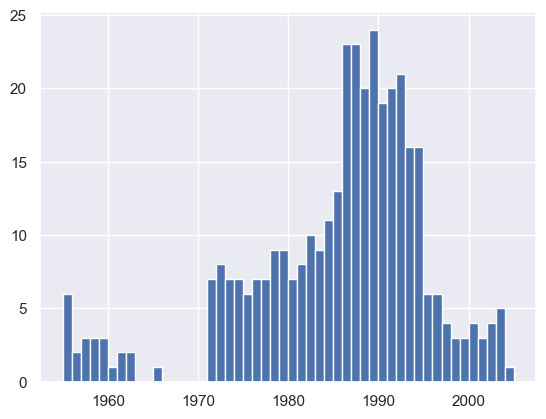

In [11]:
#We print a histogram to see the distribution of NA values inside the profit column
#bin_sizes variable will store a list with the numbers of ocurrences inside each year
bin_sizes,_,_ = plt.hist(df.year[non_numeric_profits], bins=range(1955,2006))


In [12]:
#Delete those rows
#This first line is looking for all the values that dont match the criteria of non_numeric_profits
#filter those values out and assign that to the data frame
df = df.loc[~non_numeric_profits]
#It converts the data type of the column profit to numeric
df.profit = df.profit.apply(pd.to_numeric)
len(df.profit)

25131

In [13]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

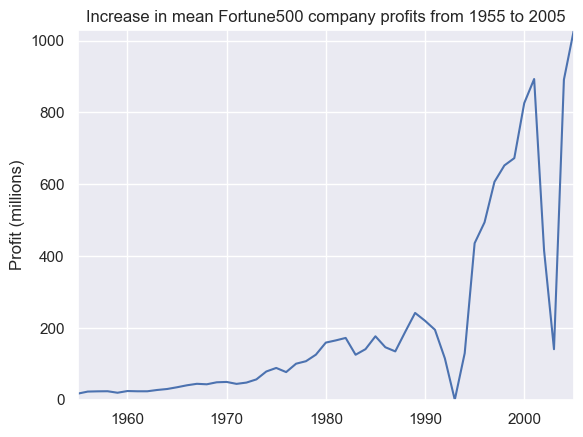

In [14]:
#Group the rows by year, : takes all the rows of the data frame, select the rows of interest and group by the year column
group_by_year = df.loc[:, ['year','revenue','profit']].groupby('year')
#Get the average of each year
avgs = group_by_year.mean()
#Get the index of the table, in this case the years
x = avgs.index
#Assign the column profit to a variable
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x = 0, y = 0)
#ax the axis object to plot on, fig the figure that shows the plot
fig, ax = plt.subplots()
#In jupyter notebook is not necessary to call the show() function to actually print the graph
plot(x, y1, ax, 'Increase in mean Fortune500 company profits from 1955 to 2005', 'Profit (millions)')


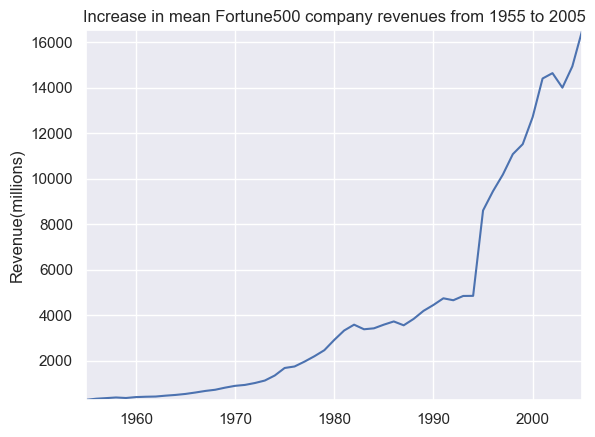

In [15]:
#Let's investiagate the revenue mean change over time
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x,y2,ax, 'Increase in mean Fortune500 company revenues from 1955 to 2005', 'Revenue(millions)')


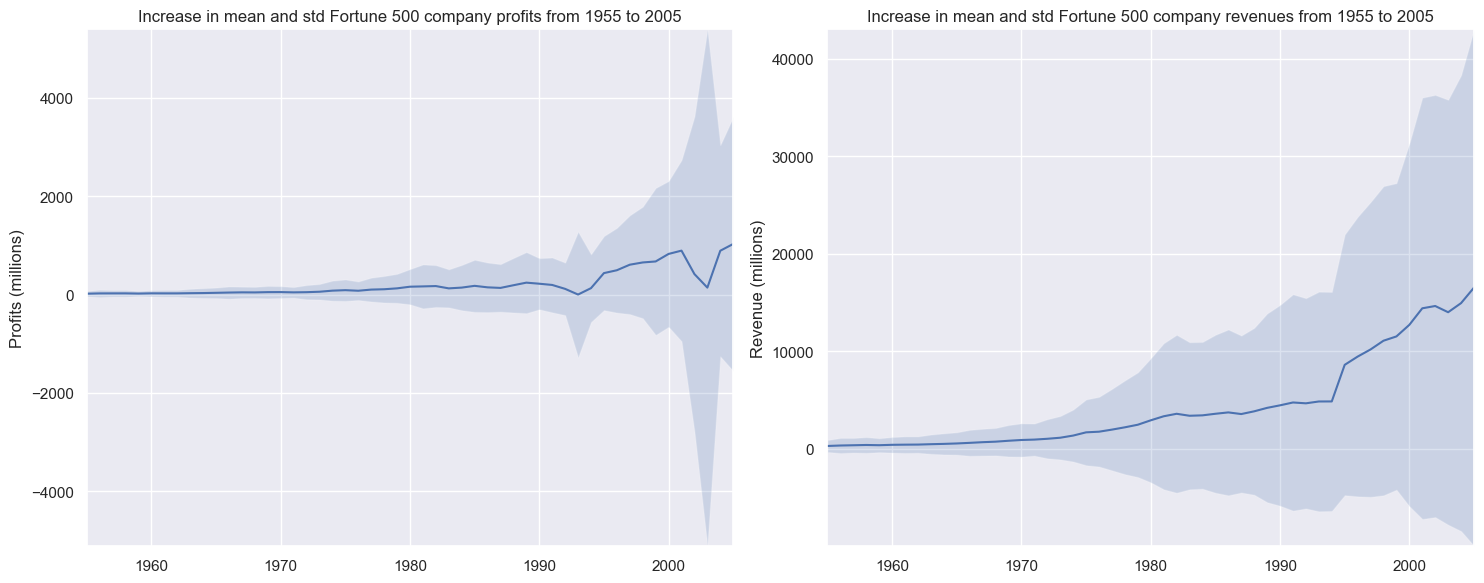

In [16]:
#Let's look at the standard deviation
#This creates a graph showing the stds as a filled curve
def plot_with_std(x,y, stds,ax,title,y_label):
    ax.fill_between(x,y - stds, y + stds, alpha=0.2)
    plot(x,y,ax, title, y_label)
#It creates two subplots (ncols=2)    
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
#We get the std of the profit and revenues columns and return them as a numpy array
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profits (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(15,6)
fig.tight_layout()